# 🔧 Data Preprocessing Steps
Look at the basics
Check descriptive stats to understand the data 📊

Drop what's not needed
Remove unnecessary columns 🗑️

Label the categories
Convert categorical columns to numbers using Label Encoder 🔢

Find the blanks
Check for missing values and handle them accordingly ❓

Outlier check
Use the IQR method to cap outliers — but only for columns with more than 2 unique values 🚫📈

Visual check
Plot a scatter plot between Income and CCAvg to spot patterns or weirdness 🎯

Standardize it
Apply standardization to scale the data ⚖️

In [122]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [124]:
data = pd.read_csv(r'Bank_Personal_Loan.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [126]:
data.describe(include = 'all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,NaN,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,NaN,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,NaN,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,NaN,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000


In [128]:
data.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [130]:
data.drop(['ID','ZIP Code'],axis=1,inplace = True)

In [132]:
le=LabelEncoder()
data['CCAvg'] = le.fit_transform(data['CCAvg'])

In [134]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19,1,0,0,1,0,0,0
1,45,19,34,3,18,1,0,0,1,0,0,0
2,39,15,11,1,12,1,0,0,0,0,0,0
3,35,9,100,1,35,2,0,0,0,0,0,0
4,35,8,45,4,12,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,24,3,0,0,0,0,1,0
4996,30,4,15,4,4,1,85,0,0,0,1,0
4997,63,39,24,2,3,3,0,0,0,0,0,0
4998,65,40,49,3,5,2,0,0,0,0,1,0


In [136]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

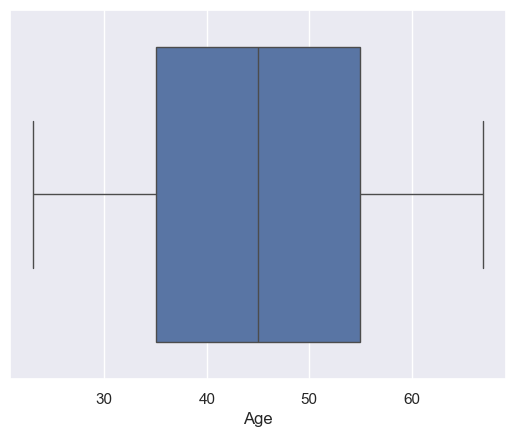

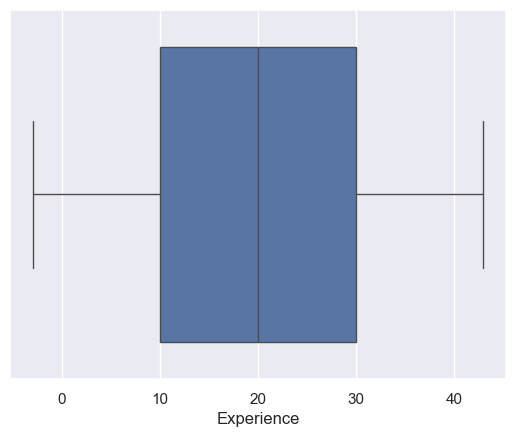

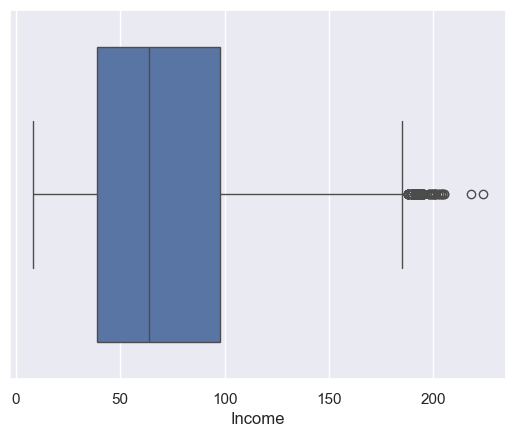

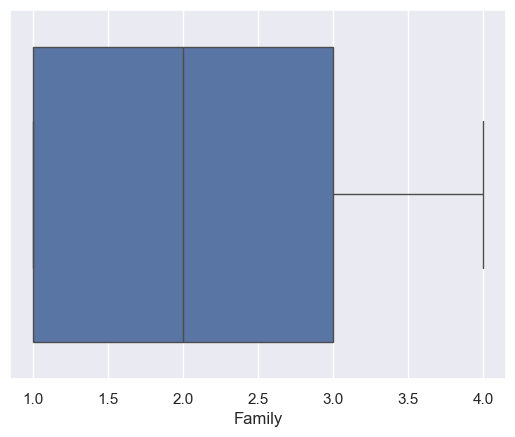

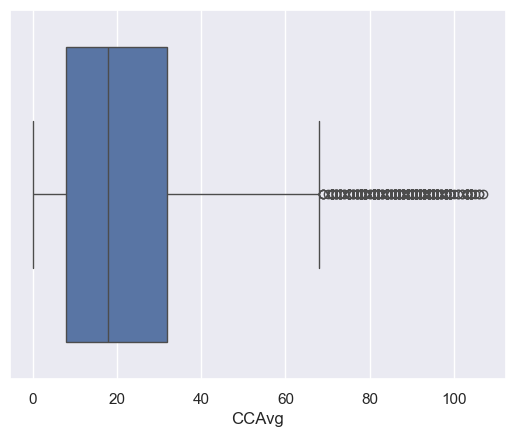

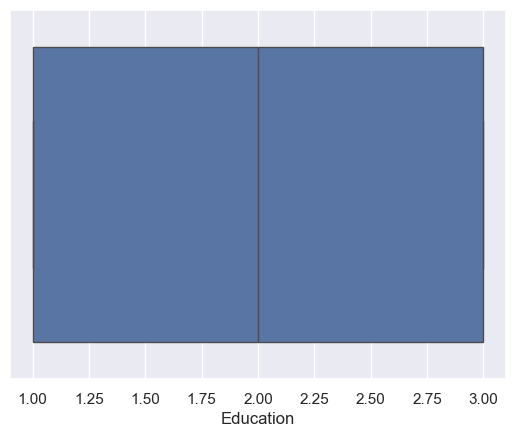

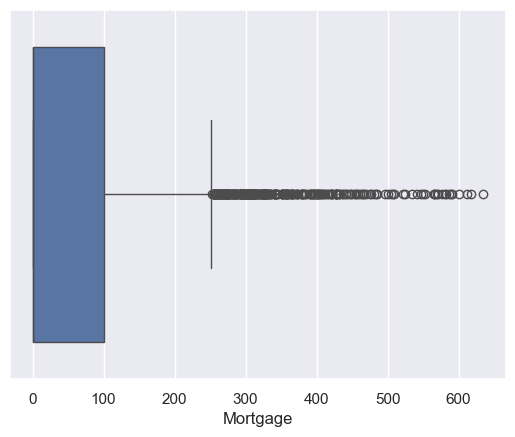

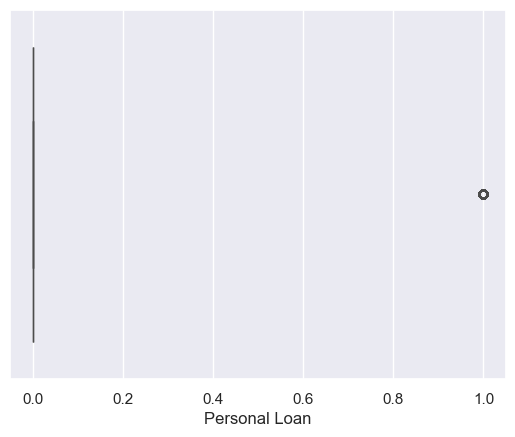

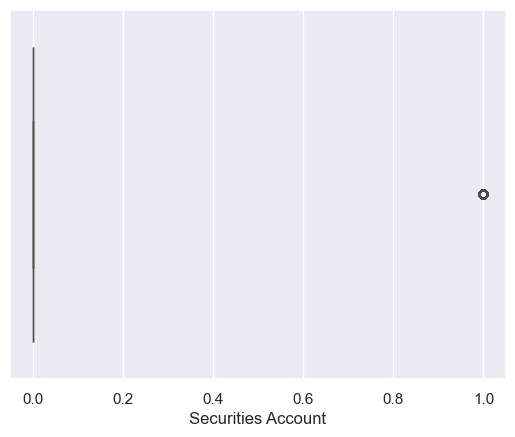

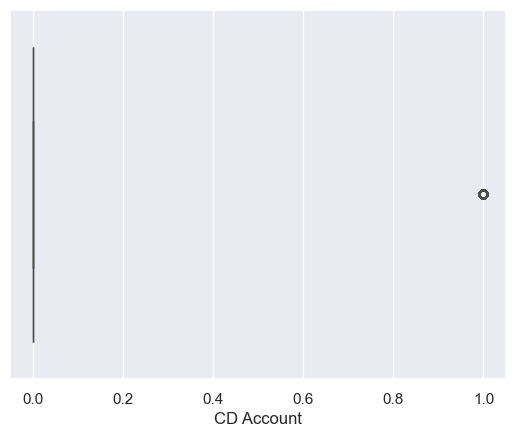

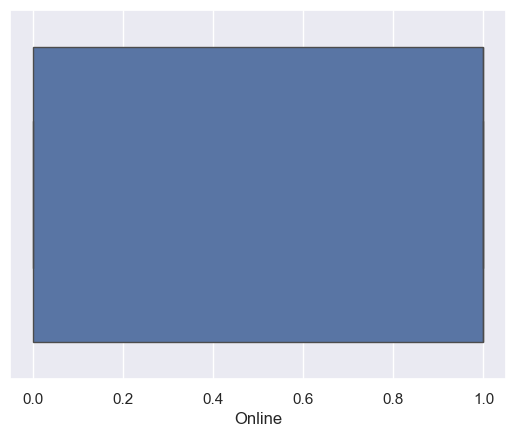

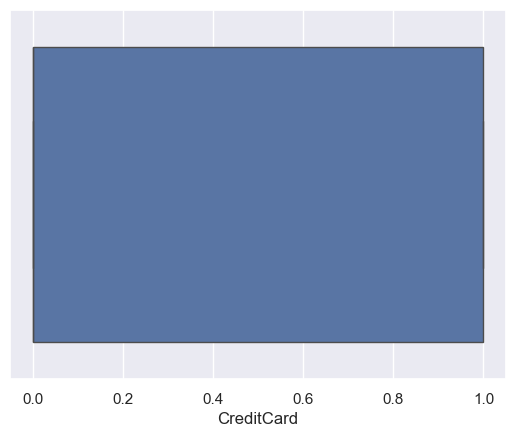

In [138]:
for i in data.columns:
    if data[i].dtypes != object:
        sns.boxplot(data=data,x=data[i])
        plt.show()

In [139]:
q1=data.quantile(0.25,numeric_only=True)
q3=data.quantile(0.75,numeric_only=True)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

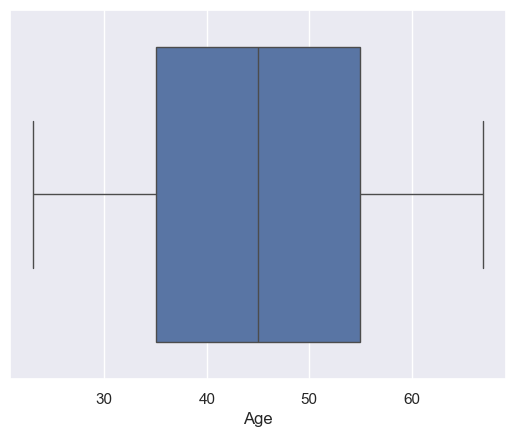

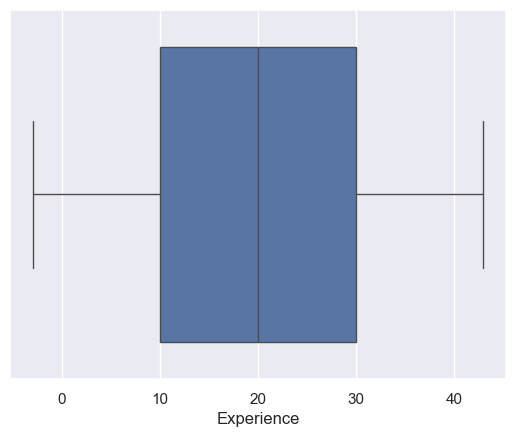

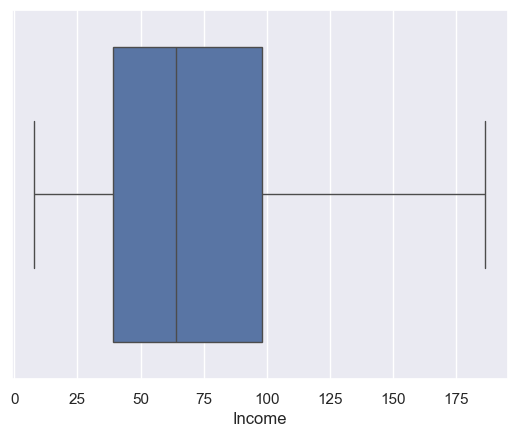

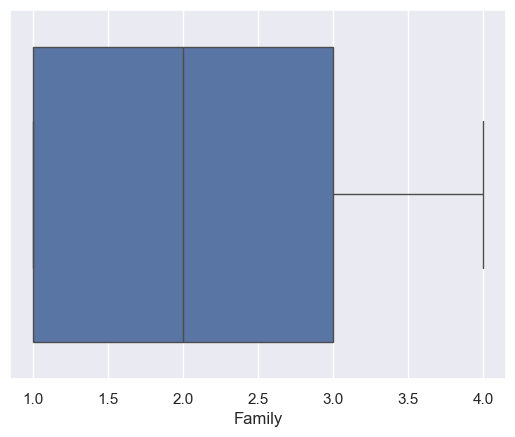

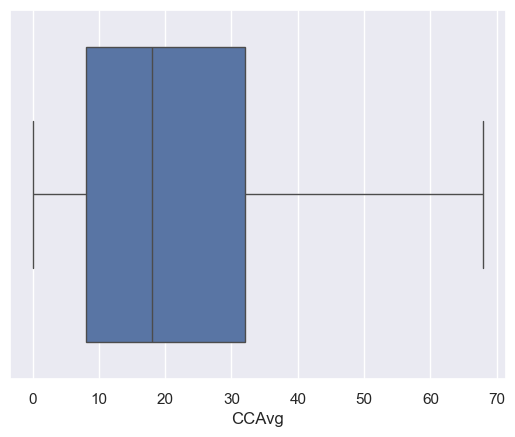

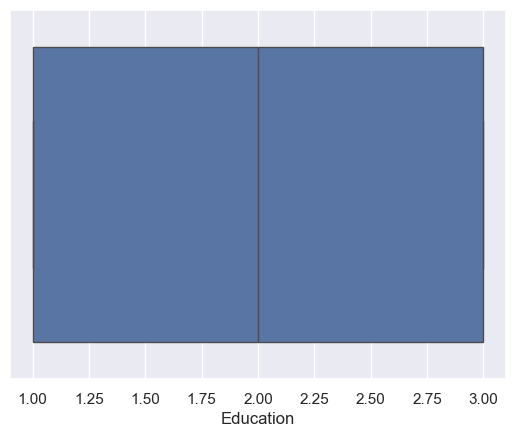

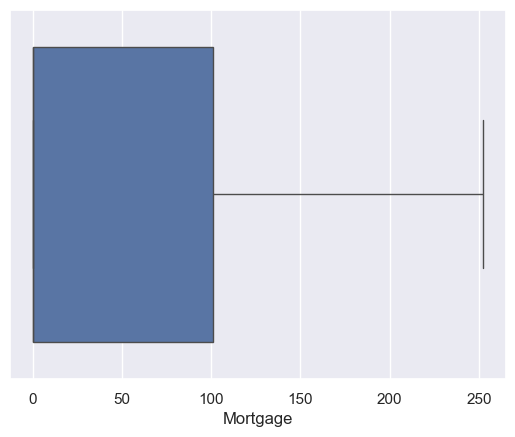

In [140]:
for i in data.columns:
    if data[i].nunique()>2:
        if data[i].dtypes!=object:
            data[i] = np.where(data[i] > upper[i],upper[i],data[i])
            data[i] = np.where(data[i] < lower[i],lower[i],data[i])
            sns.boxplot(data=data,x=data[i])
            plt.show()

In [141]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

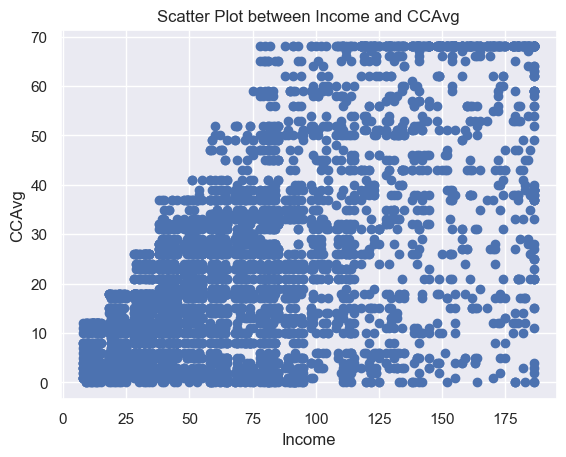

In [142]:
plt.scatter(data['Income'], data['CCAvg'])
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Scatter Plot between Income and CCAvg')
plt.show()

In [145]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

data_scaled = pd.DataFrame(data_std, columns=data.columns)
data_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.539600,1.397414,-0.216131,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.868392,0.525991,-0.267862,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.372540,-1.216855,-0.578247,-1.049078,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.578292,-1.216855,0.611562,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.627278,1.397414,-0.578247,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,1.549632


# 🤖 Modeling with K-Means
Start simple
Train a KMeans model using default settings 🎯

Find the best number of clusters

Calculate WCSS (within-cluster sum of squares) for 1 to 7 clusters

Calculate Silhouette score to measure quality 🧠

Use KneeLocator to find the "elbow" = best number of clusters (that sweet spot) 💡

Build the final model
Use your chosen number of clusters to fit a new KMeans model ✅

Predict clusters
Add a new column Segment_KM with the cluster predictions 🔢

Explore the clusters
Use groupby('Segment_KM') to analyze the characteristics of each group 🔍

Visualize it!
Plot a scatter between Income and CCAvg, color-coded by Segment_KM 🎨

In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for i in range(1,8):
    kmeans = KMeans(n_clusters=i, random_state=42)  
    kmeans.fit(data_scaled)
    
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}") 
    
    if i > 1:
        y = kmeans.predict(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, y)
        silhouette_scores.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  
    else:
        print(" (Silhouette Score not applicable for k=1)")  

Cluster 1: WCSS = 60000.0000
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 52445.1587
Silhouette Score = 0.1319
Cluster 3: WCSS = 45646.7858
Silhouette Score = 0.1384
Cluster 4: WCSS = 40902.6156
Silhouette Score = 0.1552
Cluster 5: WCSS = 38828.1828
Silhouette Score = 0.1281
Cluster 6: WCSS = 37528.9845
Silhouette Score = 0.1148
Cluster 7: WCSS = 34639.3767
Silhouette Score = 0.1314


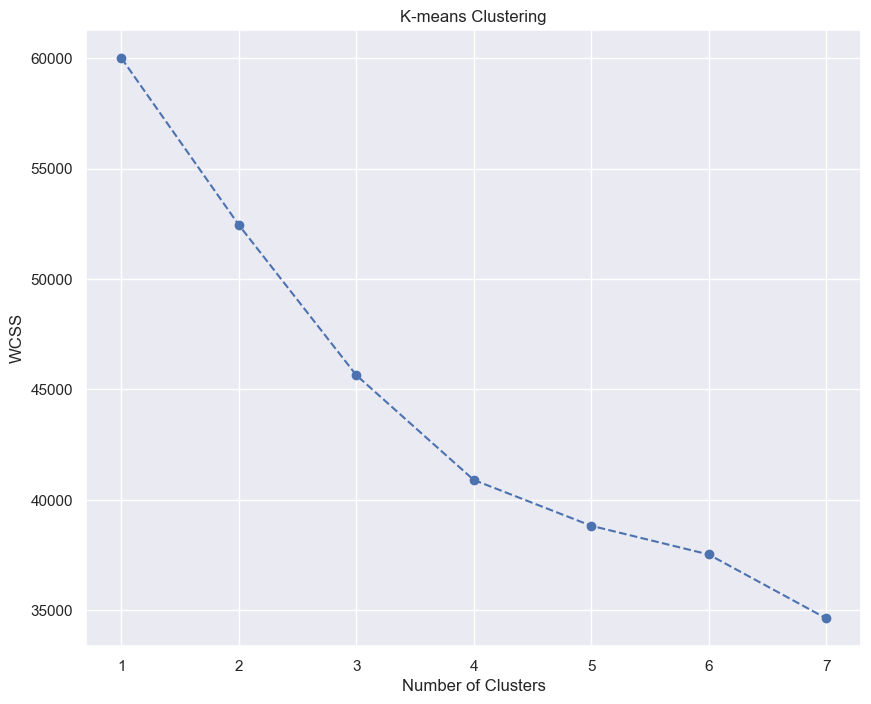

In [153]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 8), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

The optimal number of clusters (elbow point) is: 4


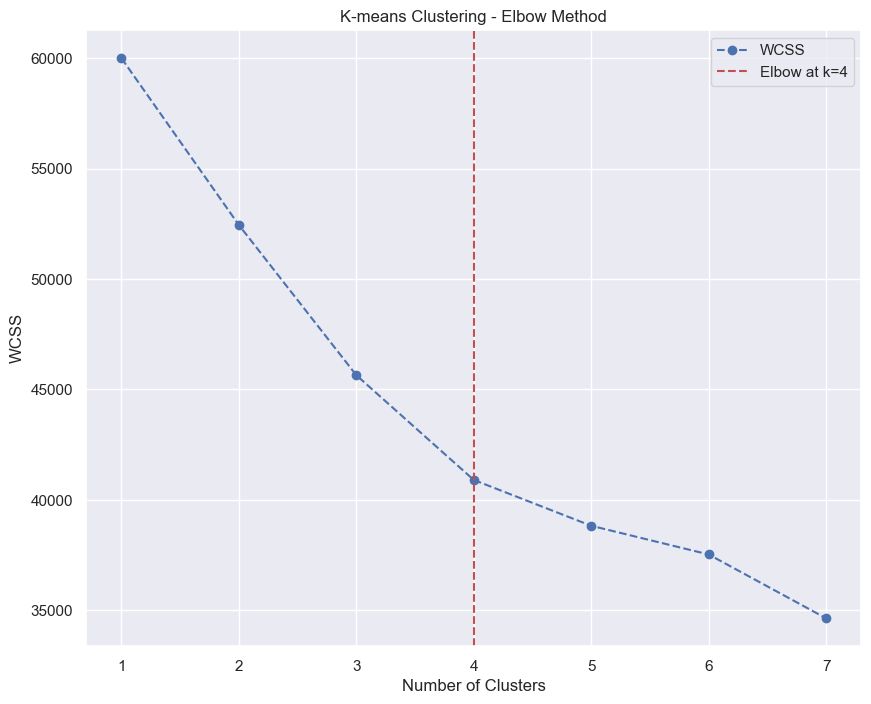

In [154]:
from kneed import KneeLocator

# Automatically find the "elbow"
knee_locator = KneeLocator(range(1, 8), wcss, curve="convex", direction="decreasing")

#Convex Curve: The plot is shaped like a gradually flattening downward curve.
#WCSS is always decreasing as we increase the number of clusters.

# Get the elbow point
optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

# Plot with the elbow point marked
plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), wcss, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [155]:
kmeans = KMeans(3)
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [156]:
data['Segments_KM'] = kmeans.predict(data_scaled)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segments_KM
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,0
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,0
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,0
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,0
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,0
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,1


In [157]:
df_segm_analysis = data.groupby(['Segments_KM'], as_index=False).mean()
df_segm_analysis

,Segments_KM,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,35.528679,10.354380,71.077812,2.425078,23.015118,1.781236,50.152290,0.00,0.104046,0.028902,0.571365,0.281014
1,1,55.207908,29.908041,60.536873,2.327854,18.217237,1.909818,45.659485,0.00,0.097734,0.034207,0.616615,0.300311
2,2,45.030000,19.826000,143.929000,2.576000,46.244000,2.200000,73.803000,0.96,0.136000,0.320000,0.622000,0.324000


C:\Users\NIcat\AppData\Local\Temp\ipykernel_13944\452226679.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Segments_KM")


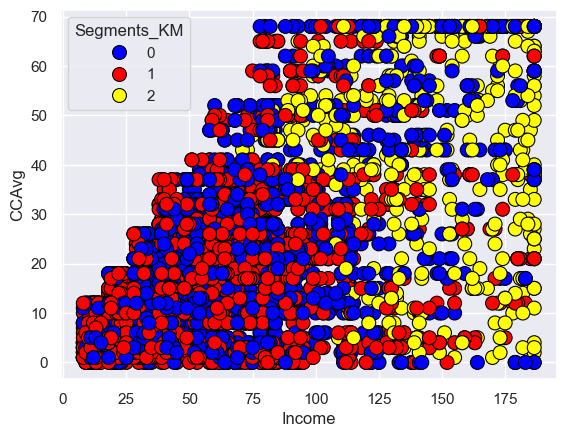

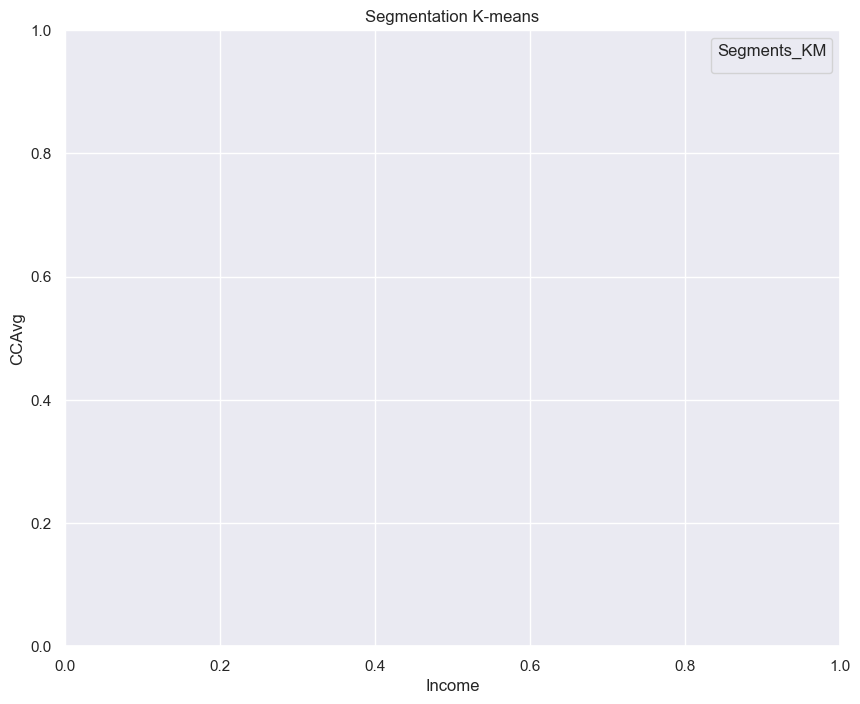

In [158]:
sns.scatterplot(x=data['Income'], y=data['CCAvg'], hue=data['Segments_KM'], palette=['blue', 'red', 'yellow'], s=100, edgecolor="black")
plt.figure(figsize=(10,8))
plt.title('Segmentation K-means')
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.legend(title="Segments_KM")
plt.show()


## 🎯  K-Means with PCA – Step-by-Step
Apply PCA on the scaled data
Fit a PCA() model and get the explained variance ratio for each principal component 📊

Pick number of components
Plot the cumulative explained variance — choose components that together explain at least 80% of the variance (best practice!) ✅

Rebuild PCA
Fit PCA(n_components=chosen_number) on the scaled data again to reduce the dimensionality 💡

Understand what each component means
Create a dataframe with PCA components (rows) × original variables (columns) to see which component relates to what 🧠

Calculate PCA scores
Get the transformed data (let’s call it scores_pca) ➡️ This is the data in the new PCA space

Wrap it up in a new dataframe
Create pca_df and rename new PCA features as Variable_1, Variable_2, etc 🧾

Run K-Means again

Calculate WCSS and Silhouette Score for clusters from 1 to 7

Use KneeLocator to find the elbow (best number of clusters) 🎯

Build final KMeans model using that cluster number

Predict clusters
Add a new column Segment_KM_PCA with predicted cluster labels 🔢

Merge original and PCA data
Combine data and pca_df into one final dataframe 📎

Visualize in 2D
Plot a scatter between Variable_1 and Variable_2, colored by Segment_KM_PCA 🎨

In [160]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(data_scaled)

PCA()

In [163]:
# The attribute shows how much variance is explained by each of the twelve individual components.
pca.explained_variance_ratio_

array([0.18606888, 0.16503731, 0.117826  , 0.09538089, 0.08469593,
       0.08238101, 0.08126058, 0.07732457, 0.04771041, 0.0364458 ,
       0.02542292, 0.0004457 ])

In [168]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 

# BEST PRACTICE around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Text(0, 0.5, 'Cumulative Explained Variance')

In [172]:
pca = PCA(n_components = 7)

In [175]:
pca.fit(data_scaled)

PCA(n_components=7)

In [177]:
pca.components_

array([[-0.2273779 , -0.22286441,  0.54673767, -0.07233208,  0.50265325,
        -0.10036616,  0.14517413,  0.45618376,  0.0912263 ,  0.2975517 ,
         0.04582872,  0.06003661],
       [ 0.66471144,  0.66596044,  0.15396376, -0.09076825,  0.13355696,
         0.00726127,  0.04290547,  0.17278583,  0.05390553,  0.15785418,
         0.04955092,  0.05335384],
       [-0.04668591, -0.053347  , -0.24616221,  0.27131023, -0.23576747,
         0.23494729, -0.0376214 ,  0.06876511,  0.44007213,  0.58157421,
         0.2541863 ,  0.38384397],
       [ 0.02271583,  0.00314041, -0.02294424,  0.43263214, -0.01325213,
         0.67991911,  0.07173465,  0.42853876, -0.20673121, -0.12927661,
        -0.20643625, -0.24177264],
       [-0.00695789, -0.00612747,  0.00562864, -0.02097635, -0.03196158,
         0.03369449,  0.13344922,  0.00879068, -0.60318755,  0.01836094,
        -0.17161405,  0.76535991],
       [-0.00589435, -0.00662418,  0.03096547,  0.09297205,  0.00845981,
         0.01898054, -

In [179]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segments_KM
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,0
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,0
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,0
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,0
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,0
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,1


In [181]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = data.columns[:-1].values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4','Component 5','Component 6','Component 7'])
df_pca_comp

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Component 1,-0.227378,-0.222864,0.546738,-0.072332,0.502653,-0.100366,0.145174,0.456184,0.091226,0.297552,0.045829,0.060037
Component 2,0.664711,0.665960,0.153964,-0.090768,0.133557,0.007261,0.042905,0.172786,0.053906,0.157854,0.049551,0.053354
Component 3,-0.046686,-0.053347,-0.246162,0.271310,-0.235767,0.234947,-0.037621,0.068765,0.440072,0.581574,0.254186,0.383844
Component 4,0.022716,0.003140,-0.022944,0.432632,-0.013252,0.679919,0.071735,0.428539,-0.206731,-0.129277,-0.206436,-0.241773
Component 5,-0.006958,-0.006127,0.005629,-0.020976,-0.031962,0.033694,0.133449,0.008791,-0.603188,0.018361,-0.171614,0.765360
Component 6,-0.005894,-0.006624,0.030965,0.092972,0.008460,0.018981,-0.131201,0.043382,-0.426552,-0.035954,0.880107,-0.113854
Component 7,0.008617,0.012361,-0.051030,0.143772,-0.136974,-0.141370,0.947866,-0.089811,0.009514,0.006176,0.125713,-0.123705


In [183]:
data_scaled

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.539600,1.397414,-0.216131,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.868392,0.525991,-0.267862,-1.049078,-0.608391,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.372540,-1.216855,-0.578247,-1.049078,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.578292,-1.216855,0.611562,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.627278,1.397414,-0.578247,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.736875,-1.216855,0.042523,1.332484,-0.608391,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4996,-1.338194,-1.404454,-1.284862,1.397414,-0.992093,-1.049078,0.415741,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4997,1.540880,1.647835,-1.087587,-0.345432,-1.043824,1.332484,-0.608391,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4998,1.715370,1.735043,-0.539600,0.525991,-0.940362,0.141703,-0.608391,-0.325875,-0.341423,-0.25354,0.821951,-0.645314


In [185]:
scores_pca = pca.transform(data_scaled)

scores_pca

array([[ 0.23560059, -2.59468284,  1.07317467, ..., -2.17873849,
        -2.05885059, -0.22375048],
       [-0.65372434, -0.36787561,  0.764678  , ..., -2.18241582,
        -2.17117071, -0.29073315],
       [-1.06088646, -1.08530844, -0.90703031, ..., -0.16036738,
        -0.95107808, -0.51299951],
       ...,
       [-2.38373076,  1.62025279, -0.280849  , ..., -0.10931038,
        -0.84617817, -0.63124927],
       [-1.94132394,  1.90577199,  0.02189751, ..., -0.51953024,
         1.0226354 , -0.12090174],
       [ 0.28111309, -2.07298131,  0.65839364, ...,  1.15789667,
         0.81521936, -0.36417068]])

In [187]:
scores_pca.shape

(5000, 7)

In [189]:
pca_df = pd.DataFrame(scores_pca, columns=[f'Variable_{i+1}' for i in range(scores_pca.shape[1])])

pca_df


,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750
1,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733
2,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000
3,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340
4,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592
...,...,...,...,...,...,...,...
4995,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327
4996,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462
4997,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249
4998,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902


In [191]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss_pca = []
silhouette_scores_pca = []

for i in range(1, 8):
    kmeans_pca = KMeans(n_clusters=i, random_state=42)  
    kmeans_pca.fit(pca_df)
    
    wcss_iter = kmeans_pca.inertia_
    wcss_pca.append(wcss_iter)
    
    print(f"Cluster {i}: WCSS = {wcss_iter:.4f}")  # Print WCSS first
    
    if i > 1:  # Calculate silhouette score only if k >= 2
        y = kmeans_pca.predict(pca_df)
        silhouette_avg = silhouette_score(pca_df, y)
        silhouette_scores_pca.append(silhouette_avg)
        print(f"Silhouette Score = {silhouette_avg:.4f}")  # Append silhouette score to output
    else:
        print(" (Silhouette Score not applicable for k=1)")  # Indicate skipping silhouette score


Cluster 1: WCSS = 48759.0355
 (Silhouette Score not applicable for k=1)
Cluster 2: WCSS = 40662.4805
Silhouette Score = 0.2694
Cluster 3: WCSS = 36713.6119
Silhouette Score = 0.1418
Cluster 4: WCSS = 32303.8823
Silhouette Score = 0.1506
Cluster 5: WCSS = 28388.8328
Silhouette Score = 0.1680
Cluster 6: WCSS = 27029.3823
Silhouette Score = 0.1621
Cluster 7: WCSS = 25512.3666
Silhouette Score = 0.1672


The optimal number of clusters (elbow point) is: 5


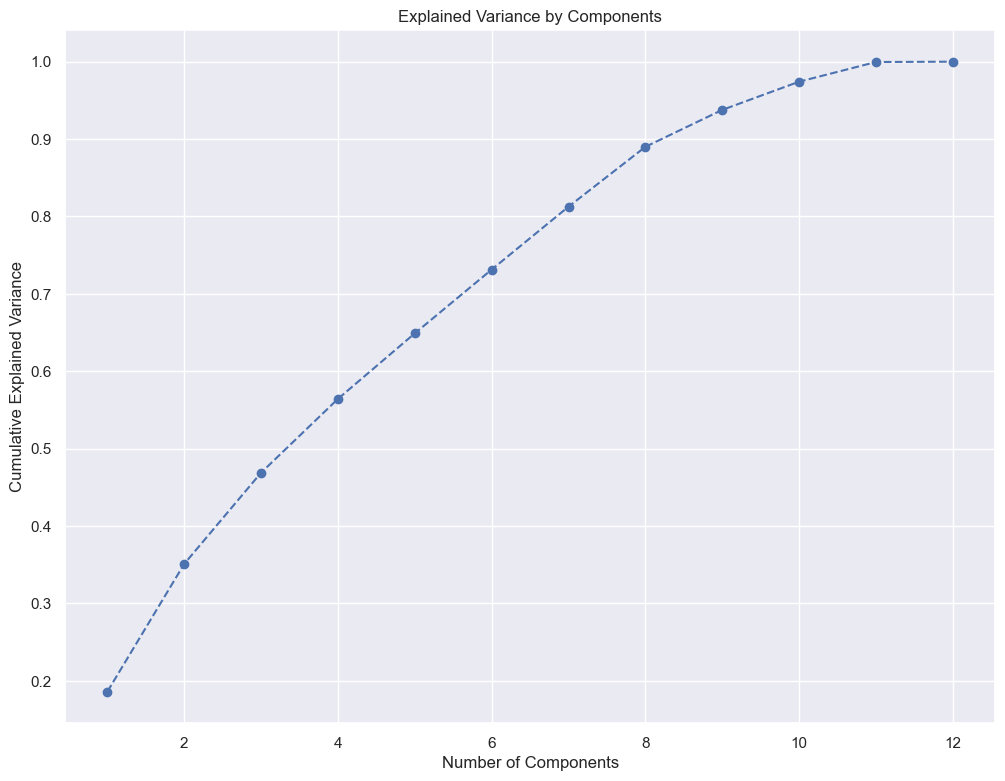

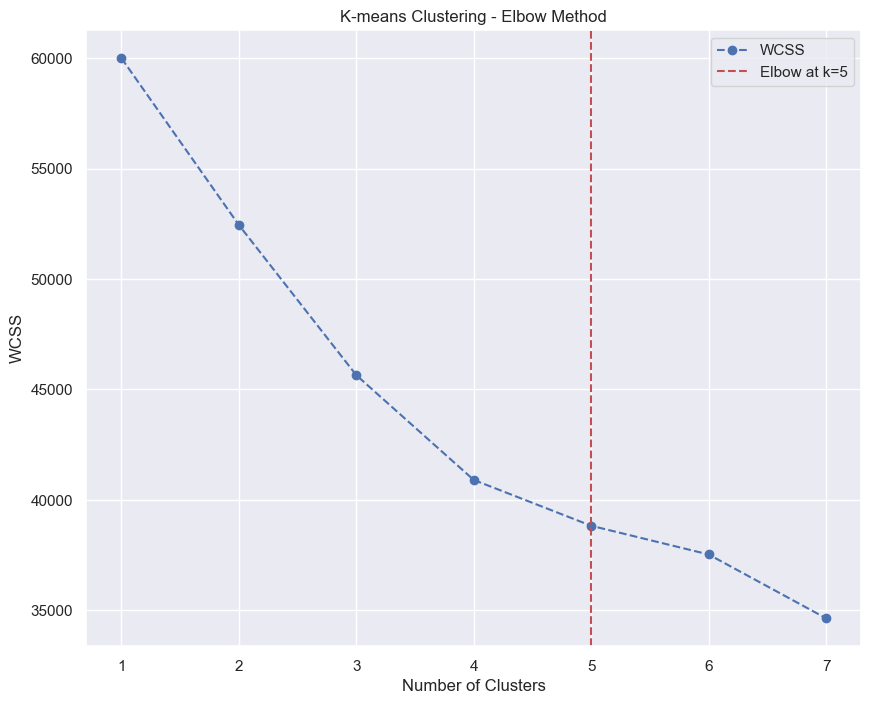

In [192]:
from kneed import KneeLocator

knee_locator = KneeLocator(range(1, 8), wcss_pca, curve="convex", direction="decreasing")

optimal_k = knee_locator.elbow
print(f"The optimal number of clusters (elbow point) is: {optimal_k}")

plt.figure(figsize=(10, 8))
plt.plot(range(1, 8), wcss, marker="o", linestyle="--", label="WCSS")
plt.axvline(optimal_k, linestyle="--", color="r", label=f"Elbow at k={optimal_k}")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering - Elbow Method")
plt.legend()
plt.show()


In [193]:
kmeans_pca = KMeans(5)
kmeans_pca.fit(pca_df)

KMeans(n_clusters=5)

In [194]:
data['Segments_KM_pca'] = kmeans_pca.predict(pca_df)
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Segments_KM,Segments_KM_pca
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,0,0,0,3
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,0,0,0,3
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,0,0,0,3
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,0,0,0,1
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,1,0,0,3
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,1,0,0,3
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,0,0,1,2
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,1,0,1,2


In [195]:
data=pd.concat([data,pca_df],axis=1)

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,CreditCard,Segments_KM,Segments_KM_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,...,0,0,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,...,0,0,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,...,0,0,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,...,0,0,1,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,...,1,0,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,...,0,0,3,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,...,0,0,3,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,...,0,1,2,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,...,0,1,2,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902


C:\Users\NIcat\AppData\Local\Temp\ipykernel_13944\2161469254.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=data['Variable_2'], y=data['Variable_1'], hue=data['Segments_KM_pca'], palette=['blue', 'red', 'yellow', 'green'], s=100, edgecolor="black")


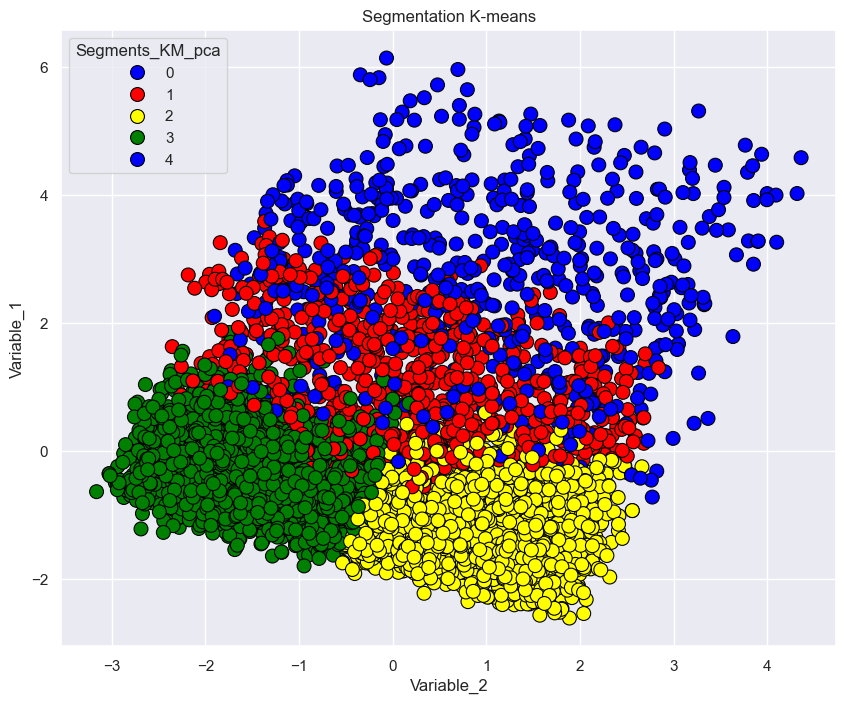

In [196]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=data['Variable_2'], y=data['Variable_1'], hue=data['Segments_KM_pca'], palette=['blue', 'red', 'yellow', 'green'], s=100, edgecolor="black")

plt.title('Segmentation K-means')
plt.xlabel("Variable_2")
plt.ylabel("Variable_1")
plt.legend(title="Segments_KM_pca")
plt.show()


## 🌿 Hierarchical Clustering (Agglomerative)
Draw the dendrogram
Use linkage and dendrogram to visualize clusters — it’ll help you decide the number of clusters (centroids) 🌳✨

Fit the model
Build the AgglomerativeClustering model using the number of clusters you picked 👌

Predict clusters
Add a new column named segment_HC with the predicted cluster labels 🧩

Visualize it
Plot a scatter between Income and CCAvg, colored by segment_HC 🎨💼

In [203]:
%matplotlib inline

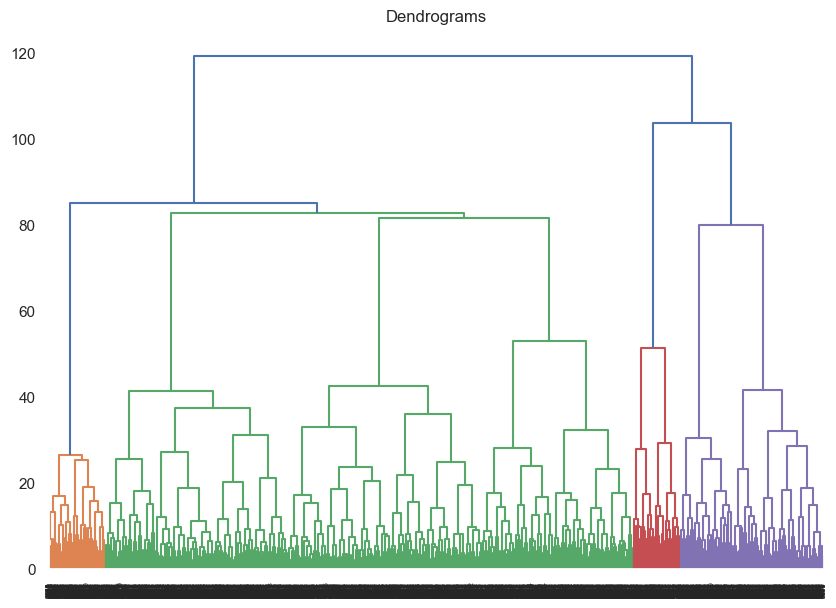

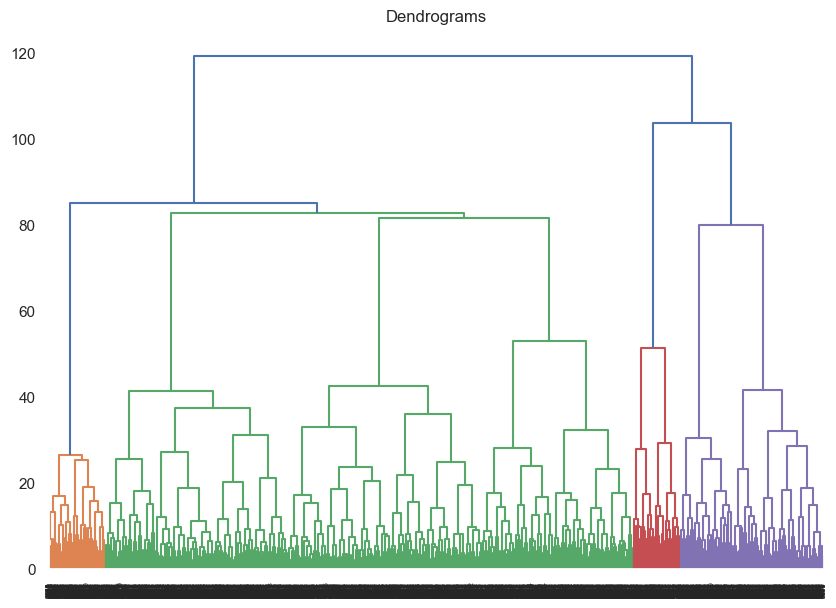

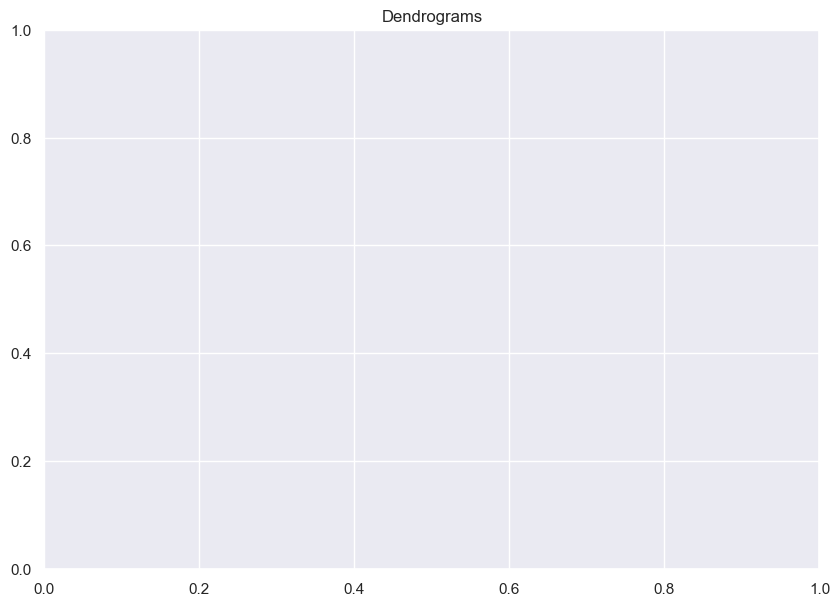

In [231]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms") 
plt.show()


dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

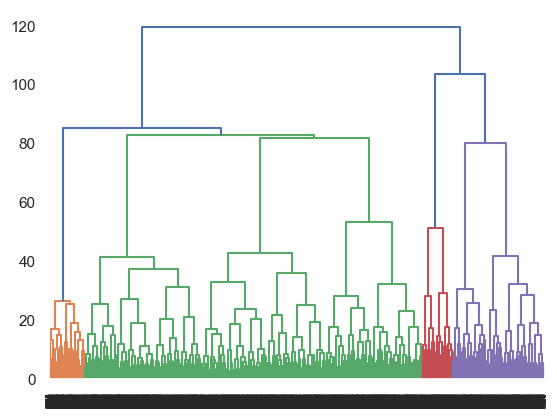

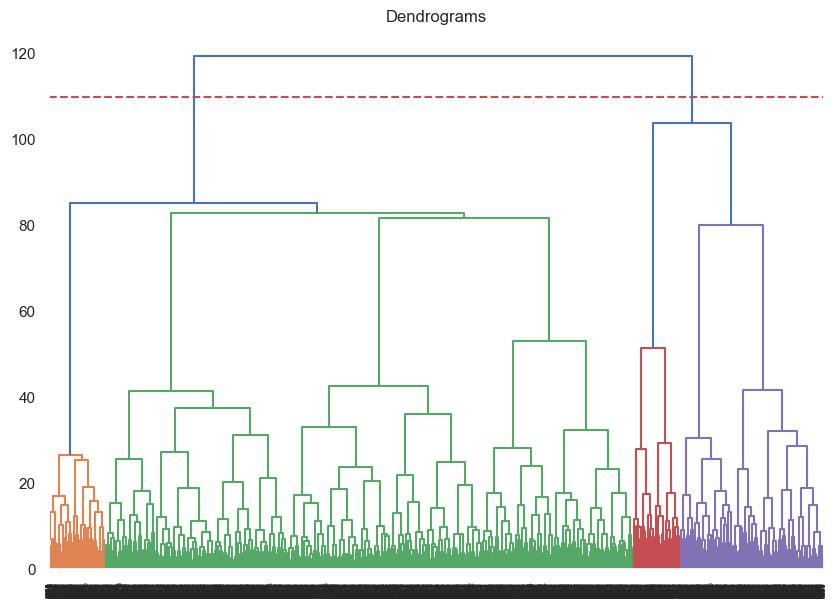

In [232]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.show()

In [234]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
y = cluster.fit_predict(data_scaled)
y
    

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [235]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Segments_KM,Segments_KM_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,segment_HC
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,...,0,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750,1
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,...,0,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733,1
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,...,0,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000,1
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,...,0,1,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340,1
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,...,0,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,...,0,3,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327,1
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,...,0,3,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,...,1,2,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,...,1,2,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902,1


In [236]:
data['segment_HC'] = y

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Segments_KM,Segments_KM_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,segment_HC
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,...,0,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750,1
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,...,0,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733,1
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,...,0,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000,1
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,...,0,1,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340,1
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,...,0,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,...,0,3,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327,1
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,...,0,3,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,...,1,2,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,...,1,2,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902,1


In [237]:
data['segment_HC'].value_counts()

segment_HC
1    3774
0    1226
Name: count, dtype: int64

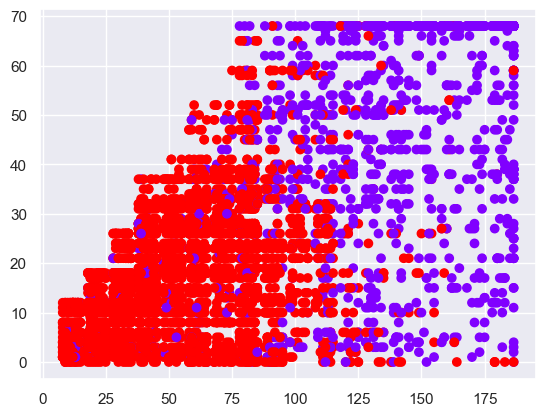

In [243]:
plt.scatter(data['Income'],data['CCAvg'],c=data['segment_HC'],cmap='rainbow')
plt.xlim()
plt.ylim()
plt.show()

## 🧬 Agglomerative Clustering (PCA Version)
Draw the dendrogram
Use the pca_df (your PCA-transformed data) to build a dendrogram — this helps you decide how many clusters to use 🌳

Build the model
Create the AgglomerativeClustering model using the number of clusters you chose ✅

Predict the clusters
Add a new column named segment_HC_PCA with the predicted cluster labels 🧩

Visualize the result
Plot a scatter plot between Variable_1 and Variable_2, coloring the points by segment_HC_PCA 🎨

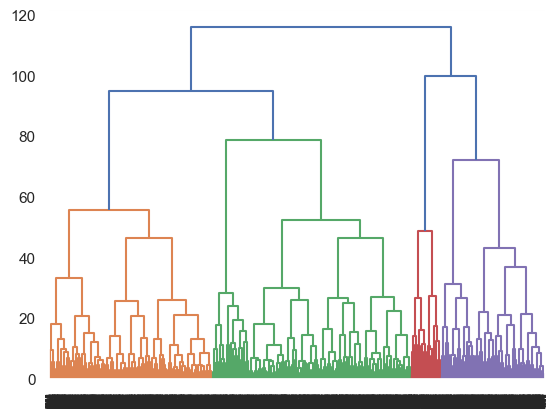

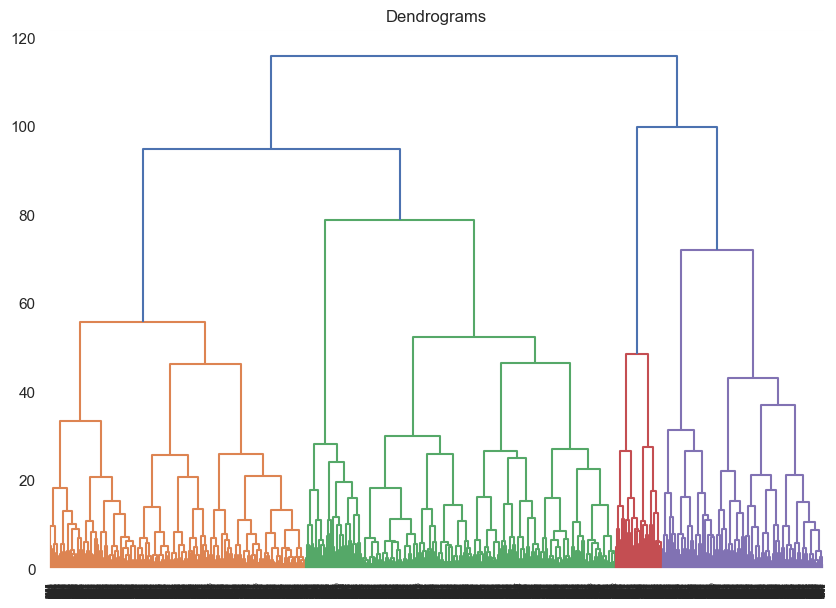

In [247]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))  
plt.show() 


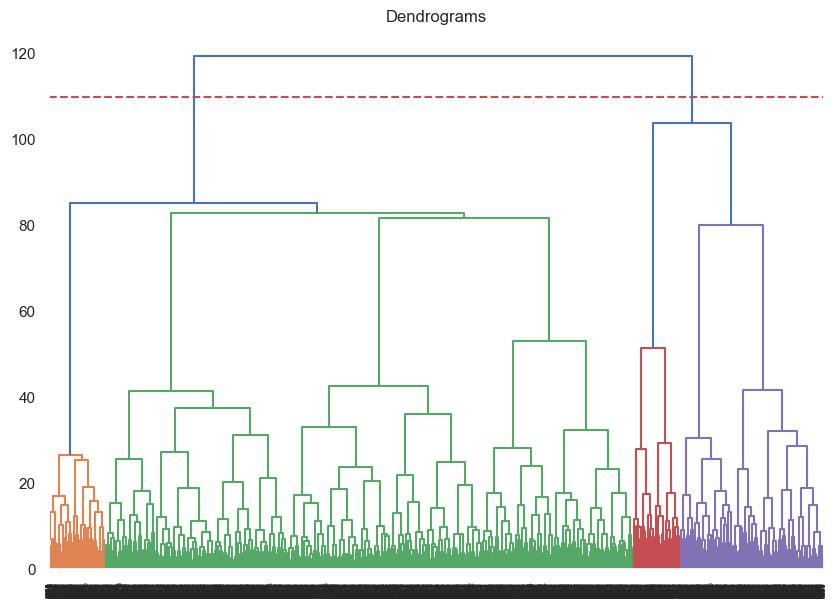

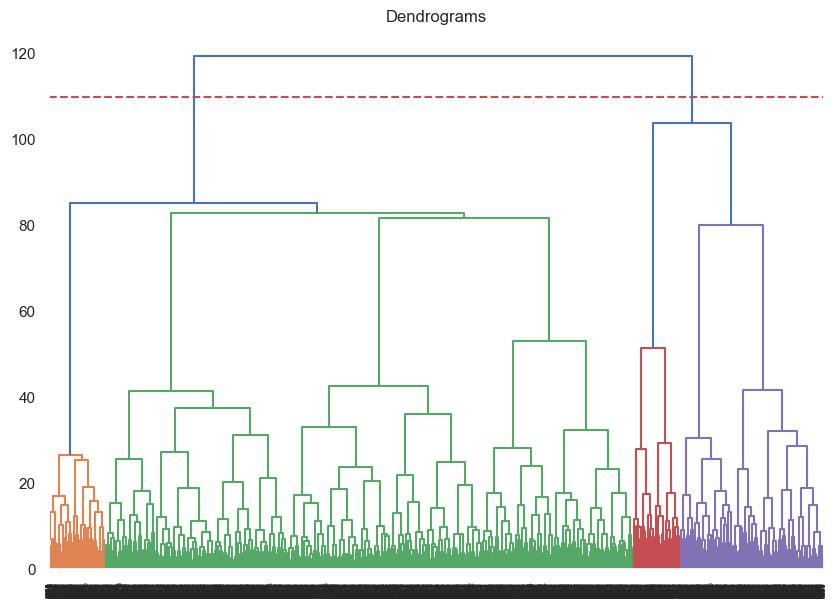

In [251]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=110, color='r', linestyle='--')
plt.show()

In [265]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
y = cluster.fit_predict(pca_df)
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [267]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Segments_KM_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,segment_HC,segment_HC_PCA
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,...,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750,1,1
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,...,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733,1,1
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,...,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000,1,1
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,...,1,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340,1,1
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,...,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,...,3,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327,1,1
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,...,3,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462,1,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,...,2,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249,1,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,...,2,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902,1,1


In [269]:
data['segment_HC_PCA'] = y

data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,...,Segments_KM_pca,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,segment_HC,segment_HC_PCA
0,25.0,1.0,49.0,4.0,19.0,1.0,0.0,0,1,0,...,3,0.235601,-2.594683,1.073175,-0.487857,-2.178738,-2.058851,-0.223750,1,1
1,45.0,19.0,34.0,3.0,18.0,1.0,0.0,0,1,0,...,3,-0.653724,-0.367876,0.764678,-0.812067,-2.182416,-2.171171,-0.290733,1,1
2,39.0,15.0,11.0,1.0,12.0,1.0,0.0,0,0,0,...,3,-1.060886,-1.085308,-0.907030,-0.887303,-0.160367,-0.951078,-0.513000,1,1
3,35.0,9.0,100.0,1.0,35.0,2.0,0.0,0,0,0,...,1,0.680218,-1.197831,-1.343793,-0.147767,-0.141658,-0.852479,-0.953340,1,1
4,35.0,8.0,45.0,4.0,12.0,2.0,0.0,0,0,0,...,3,-0.614857,-1.720613,0.789939,0.495726,1.515205,-0.906148,-0.625592,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29.0,3.0,40.0,1.0,24.0,3.0,0.0,0,0,0,...,3,-0.115314,-2.063077,-0.035588,0.265215,-0.433749,0.925295,-0.731327,1,1
4996,30.0,4.0,15.0,4.0,4.0,1.0,85.0,0,0,0,...,3,-0.775635,-2.380202,0.445716,-0.121032,-0.403321,0.961965,1.123462,1,1
4997,63.0,39.0,24.0,2.0,3.0,3.0,0.0,0,0,0,...,2,-2.383731,1.620253,-0.280849,1.162740,-0.109310,-0.846178,-0.631249,1,1
4998,65.0,40.0,49.0,3.0,5.0,2.0,0.0,0,0,0,...,2,-1.941324,1.905772,0.021898,0.299570,-0.519530,1.022635,-0.120902,1,1


In [271]:
data['segment_HC_PCA'].value_counts()

segment_HC_PCA
1    3659
0    1341
Name: count, dtype: int64

In [273]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Segments_KM', 'Segments_KM_pca', 'Variable_1',
       'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6',
       'Variable_7', 'segment_HC', 'segment_HC_PCA'],
      dtype='object')

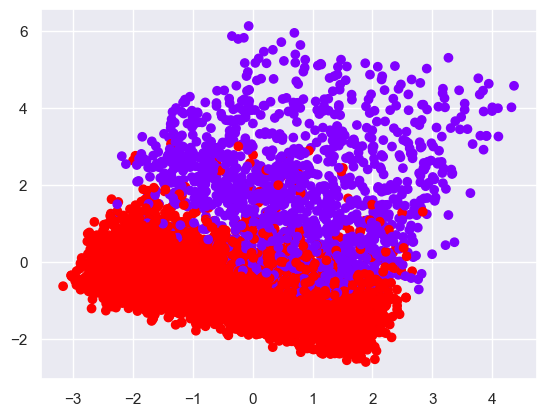

In [275]:
plt.scatter(data['Variable_2'],data['Variable_1'],c=data['segment_HC_PCA'],cmap='rainbow')
plt.xlim()
plt.ylim()
plt.show()